In [2]:
#ctl + shift + p
a=4
a

4

In [9]:
from PIL import Image
img = Image.open("C:\data\img\cells.png")
import numpy as np
imgarr = np.array(img)
imgarr.shape
imgarr[0][0]

array([230, 243, 252], dtype=uint8)

In [21]:
from PIL import Image
img = Image.open(".//img/cells.png")
import numpy as np
imgarr = np.array(img)
imgarr.shape

(480, 640, 3)

In [37]:
baseFolder="c:/data/img/"
# 파일만 보여줌
import os
print(os.listdir(baseFolder))

# 폴더경로와 더불어서
from glob import glob
glob(baseFolder + '*')

['cells.png', 'lena_color.bmp', 'pen.png', 'rice.png', 'Taegeuk.bmp', 'Taegeuk_result.png', '고등어.png', '나비.png']


['c:/data/img\\cells.png',
 'c:/data/img\\lena_color.bmp',
 'c:/data/img\\pen.png',
 'c:/data/img\\rice.png',
 'c:/data/img\\Taegeuk.bmp',
 'c:/data/img\\Taegeuk_result.png',
 'c:/data/img\\고등어.png',
 'c:/data/img\\나비.png']

In [23]:
!pip install PILLOW
#이미지처리기본모듈(pillow), 중고급모듈(opencv), 분석관련한이미지처리(skimg)

In [38]:
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

baseFolder = "c:/data/img/"
fileList=glob(baseFolder + '*')
sh3, sh4 = [], []
sh3Cnt,sh4Cnt = 0,0



for cnt, i in enumerate(fileList):
    img = Image.open(i).resize((100,200))
    imgArr = np.array(img)/255
    # plt.imshow(imgArr)
    # plt.show()
    # print('\n **file==>', i, '-'*20)
    

    # if imgArr.shape[2]==3:
    #     sh3.append(imgArr)
    #     print('sh3에 추가함')
    # else:
    #     sh4.append(imgArr)
    #     print('sh4에 추가함')

    if cnt%3==0: print(cnt, 'bun process')
    if imgArr.shape[2]==3:
        sh3.append(imgArr)
        sh3Cnt+=1
    else:
        sh4.append(imgArr)
        sh4Cnt+=1



print(sh3Cnt, sh4Cnt)

0 bun process
3 bun process
6 bun process
4 4


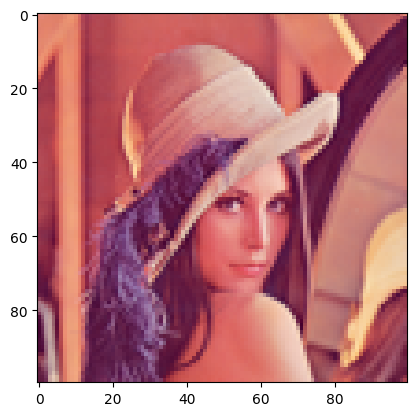

In [42]:
# fileName = "C:\data\img\lena_color.bmp"
# img = Image.open(fileName).resize((100,100))
fileName='c:/data/img/lena_color.bmp'
img=Image.open(fileName).resize((100,100))
imgArr=np.array(img)
imgsc=imgArr/255
#imgsc[imgsc[:,:,2]<0.5]=1
plt.imshow(imgsc)

# TODO: NPY & NPZ

## NPY저장

In [51]:
from PIL import Image
from glob import glob
fileList=glob('c:/data/img/*')
file=fileList[0]

img=Image.open(file).resize((20,30))
imgArr=np.array(img)/256
np.save('c:/data/test.npy',imgArr)

# NPY불러오기

In [52]:
file = np.load('c:/data/test.npy')
np.min(file), np.max(file)

(0.17578125, 0.99609375)

In [65]:
from PIL import Image
from glob import glob

# x=[]; y=[]
x, y = [], []
fileList=glob('c:/data/img/*')

file=fileList[0]
img = Image.open(file).resize((20,30))
imgArr=np.array(img)/256

x.append(imgArr)
y.append('cells')

file = fileList[1]
img = Image.open(file).resize((20,30))
imgArr=np.array(img)/256

x.append(imgArr)
y.append('lena_color')

In [62]:
np.savez('c:/data/imgsXY.npz', xData=x, yData=y)

In [63]:
npzList=np.load('c:/data/imgsXY.npz')
list(npzList)

['xData', 'yData']

In [69]:
xx=npzList['xData']
yy=npzList['yData']

np.shape(xx), np.shape(yy)

((2, 30, 20, 3), (2,))

## For문 활용

In [71]:
from PIL import Image
from glob import glob

x, y = [], []
fileList=glob('c:/data/img/*')

for file in fileList:
    img = Image.open(file).resize((20,30))
    imgArr=np.array(img)/256

    # Data 중에 [R, G, B]만 저장하자, shape하면 30, 20, 3으로 되어 있는 자료만 저장
    if imgArr.shape[2] == 3:
        x.append(imgArr)
        name=file.split('\\')[1]
        fileName = name.split('.')[0]
        y.append(fileName)

np.savez('c:/data/imgsXY.npz', xData=x, yData=y)

In [74]:
npzList = np.load('c:/data/imgsXY.npz')
xx, yy = npzList['xData'], npzList['yData']
np.shape(xx), np.shape(yy)

((4, 30, 20, 3), (4,))

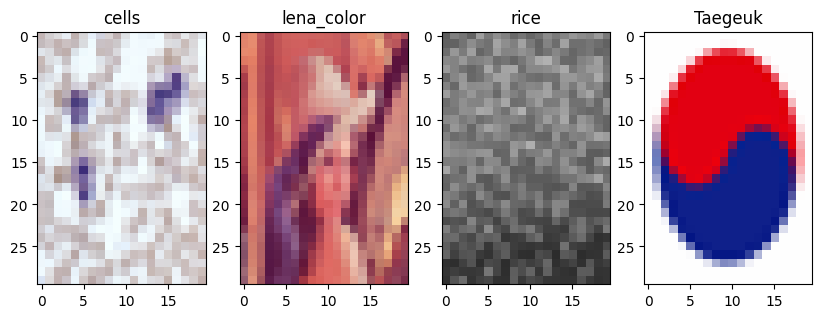

In [87]:
cnt = 1
plt.figure(figsize=(10,5))

for x,y in zip(xx, yy):
    plt.subplot(1, len(xx), cnt)
    plt.imshow(x)
    plt.title(y)
    cnt+=1

In [88]:
len(xx)

4

In [89]:
np.min(xx), np.max(xx)

(0.0, 0.99609375)

#JPG or PNG 파일로 존재하지 않는 이미지 처리시 load, array를 불러와 npy, npz로 저장!

#인공지능데이터셋은 x_train, y_train, x_test, y_test로 저장

In [100]:
!pip install tensorflow-cpu
import tensorflow as tf

In [110]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
aa = mnist.load_data()
# type(aa)
(x_train, y_train),(x_test, y_test) = mnist.load_data()
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

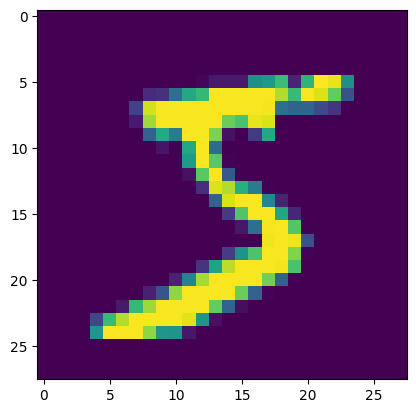

In [114]:
xx=x_train[:5]
yy=y_train[:5]

plt.imshow(xx[0])
# plt.plot(xx[0])

In [103]:

a=[1,3,4]
a[0]=999
a

[999, 3, 4]

In [127]:
#TUPLE
a=(1,3,4)
list1 = list(a)
list1[0]=999
list1


[999, 3, 4]